#  Importing Packages

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 

In [3]:
sample_data=pd.read_csv("data/sample_submission.csv")
train_data=pd.read_csv("data/train.csv")
test_data=pd.read_csv("data/test.csv")

In [4]:
train_data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_data.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
sample_data.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [7]:
train_data.isnull().sum()/train_data.count()*100

label       0.0
pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 785, dtype: float64

In [8]:
train_data['ImageId'] = range(0, len(train_data))
test_data['ImageId'] = range(0, len(test_data) )

NameError: name 'X' is not defined

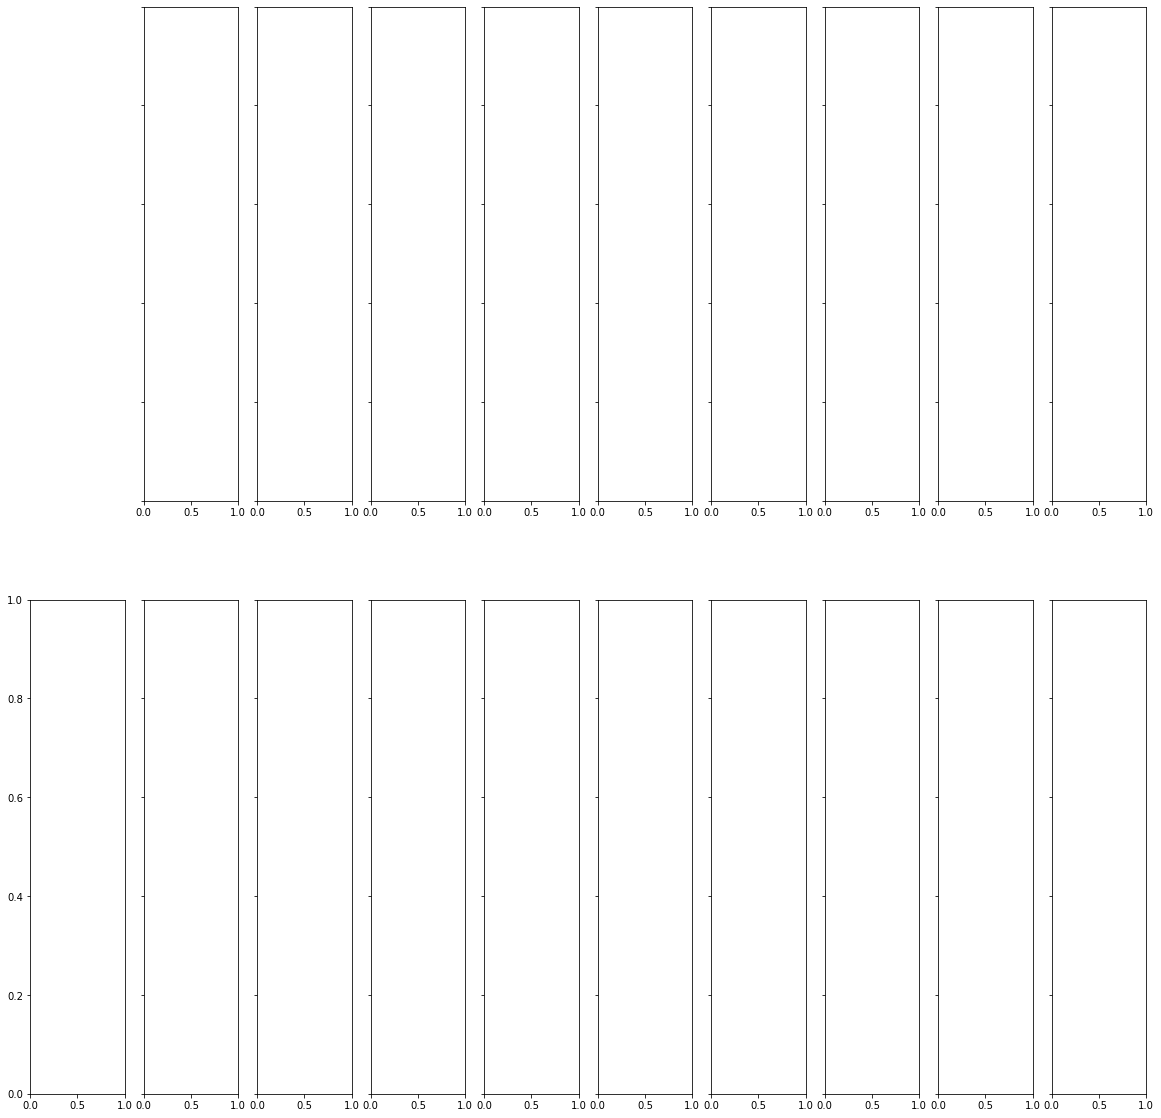

In [11]:
y=train_data["label"]
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [12]:
train_data.drop(columns="label",inplace=True)
train_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,ImageId
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [16]:
train_data[0,:,:,0]

TypeError: '(0, slice(None, None, None), slice(None, None, None), 0)' is an invalid key

TypeError: '(0, slice(None, None, None), slice(None, None, None), 0)' is an invalid key

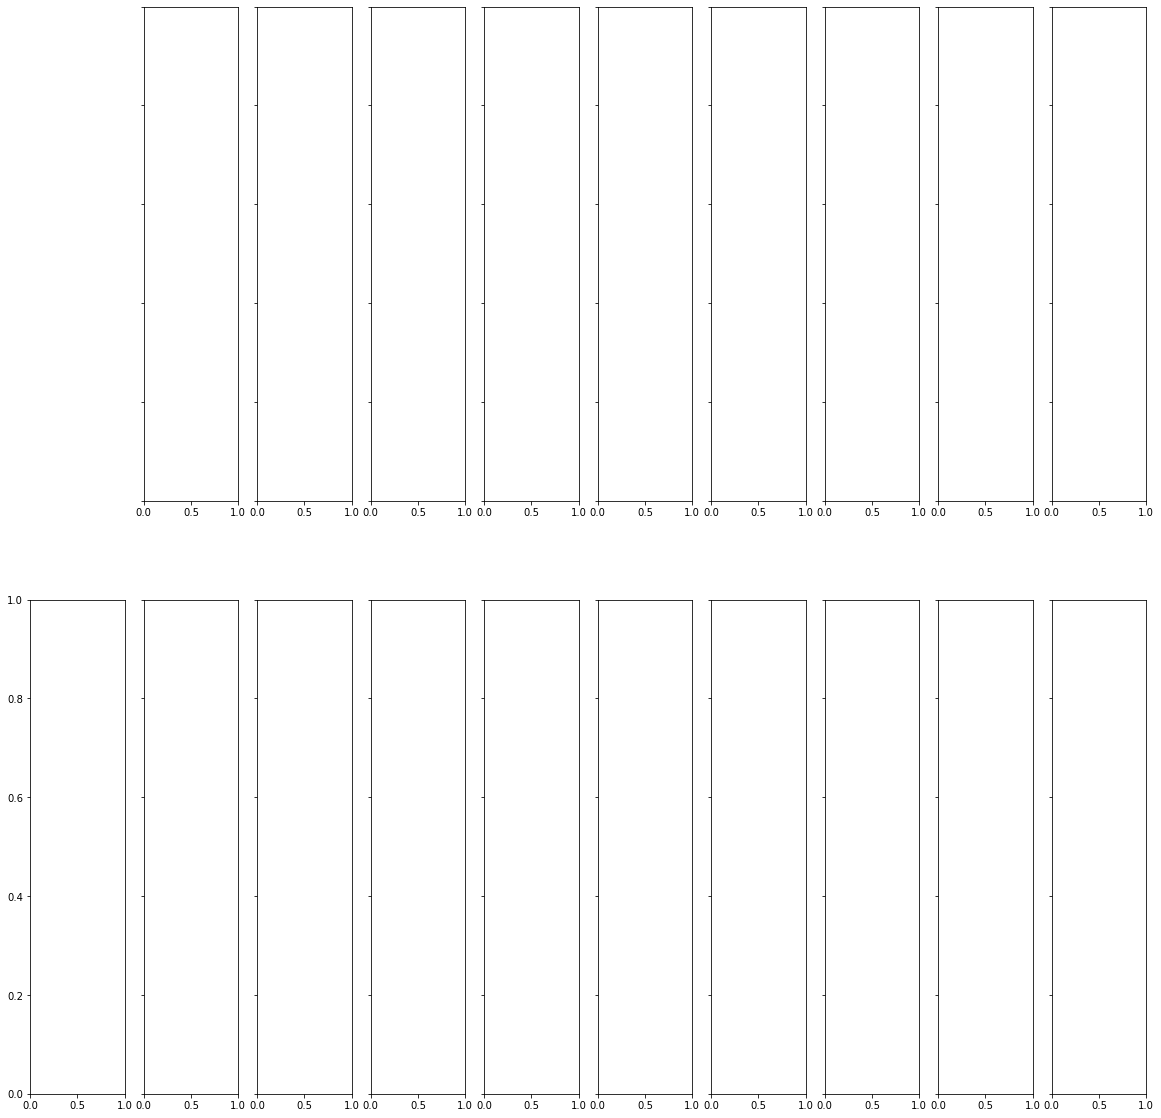

In [15]:
f, axes = plt.subplots(2, 10, sharey=True,figsize=(20,20))
for i,ax in enumerate(axes.flat):
    ax.axis('off')
    ax.imshow(train_data[i,:,:,0],cmap="gray")

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.2)

In [ ]:
x_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,ImageId
31587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31587
16740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16740
27276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27276
27566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27566
8932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26588
38019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38019
22383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22383
7982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7982


In [ ]:
y_train

31587    6
16740    1
27276    8
27566    9
8932     9
        ..
26588    6
38019    6
22383    0
7982     7
18488    8
Name: label, Length: 33600, dtype: int64

In [ ]:
SVM = SVC()
#SVM.fit(x_train,y_train)
#SVM.score(x_train,y_train)